In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 10.



In [3]:
PROJDIR='../../../data/raw_data/rheMac10/Stauffer_caudate'
ARCHDIR=file.path(PROJDIR,'ArchR_Stauffer_caudate')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

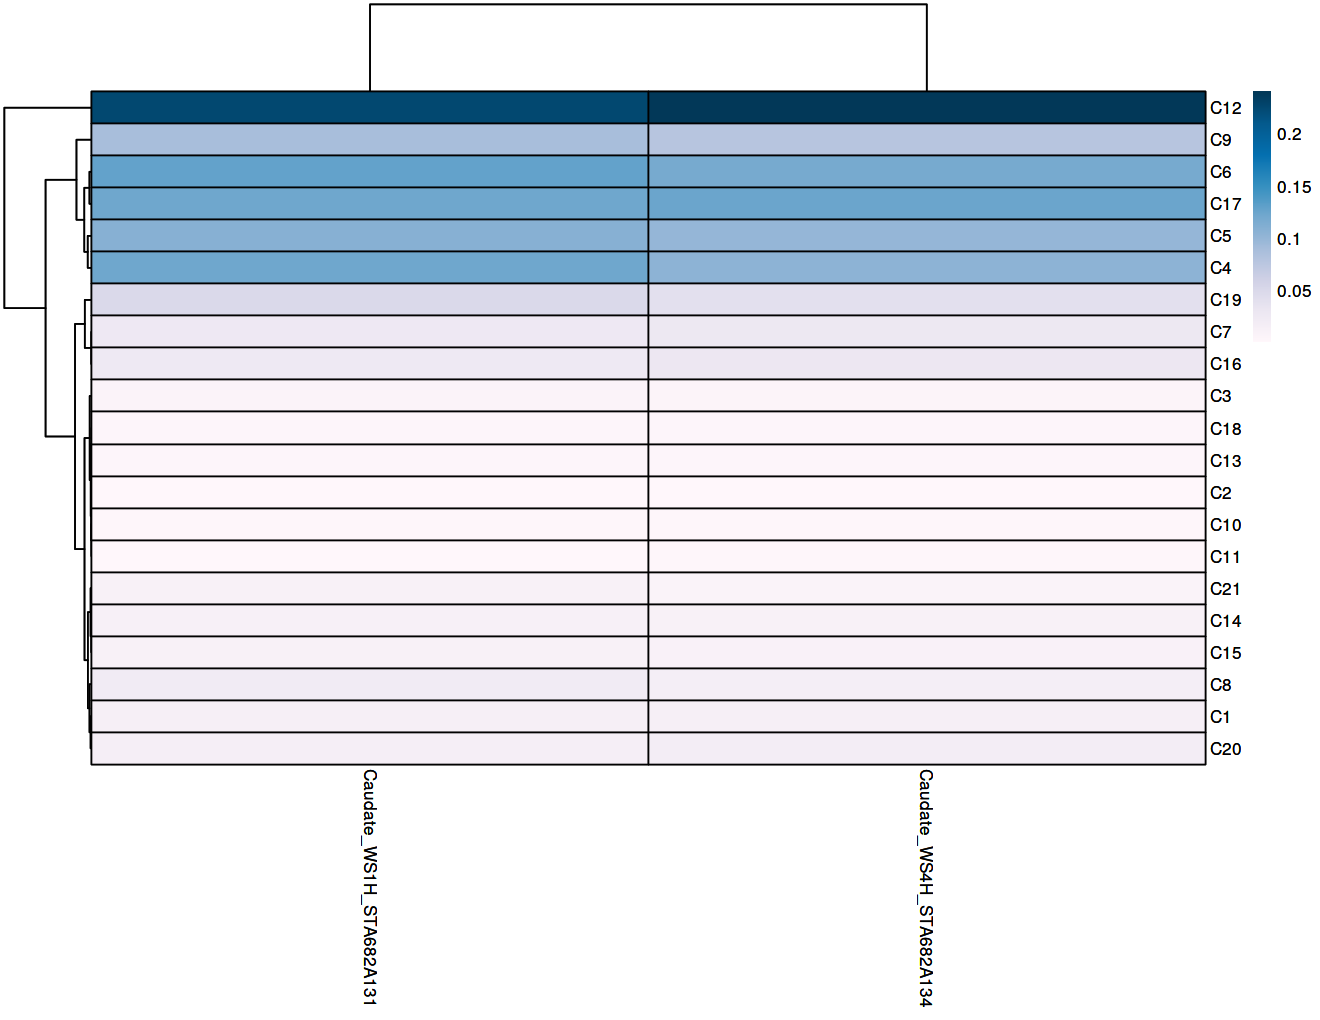

In [4]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$ClustersI150), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b3d87c463-Date-2021-01-28_Time-16-35-55.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b3d87c463-Date-2021-01-28_Time-16-35-55.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b16c8e4c9-Date-2021-01-28_Time-16-35-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b16c8e4c9-Date-2021-01-28_Time-16-35-56.log



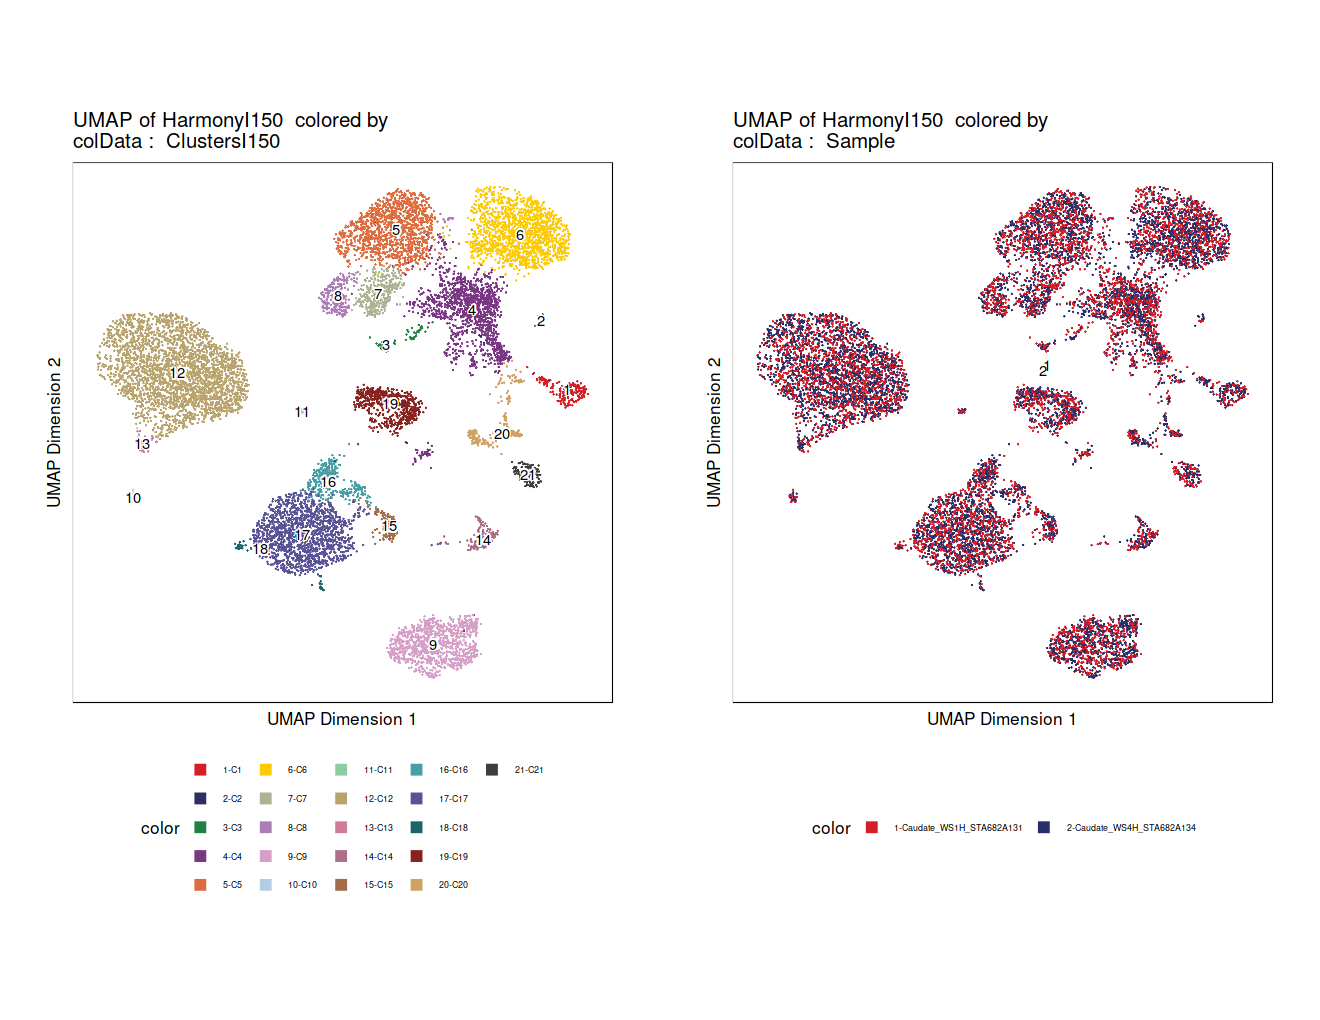

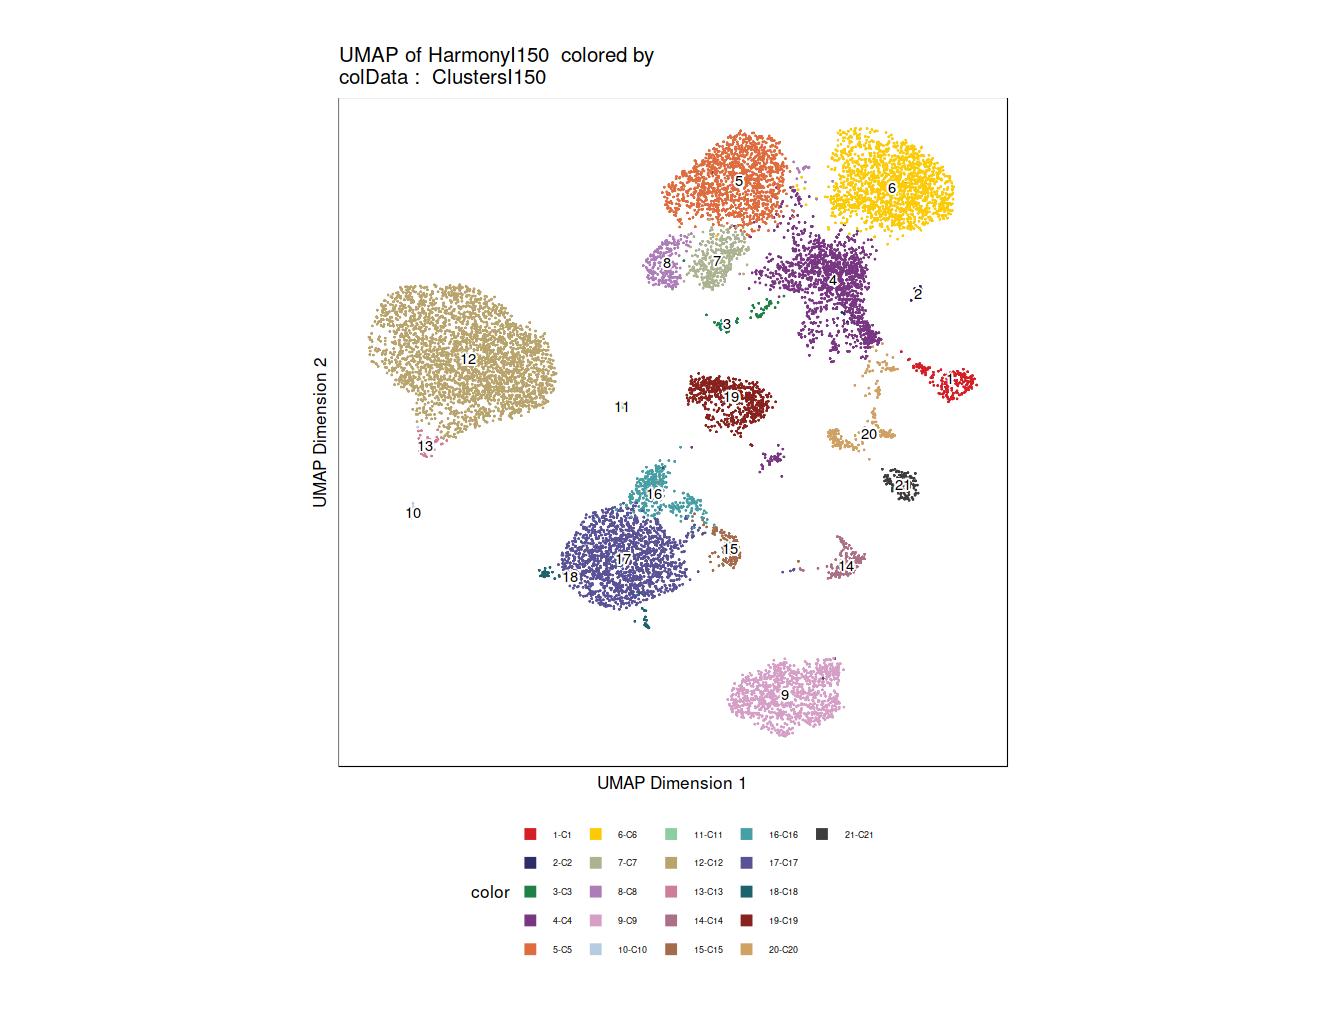

In [12]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersI150", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAP")

ggAlignPlots(p1, p2, type = "h")
p1

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b55b314f2-Date-2021-01-28_Time-16-34-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-28 16:34:22 : 



Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b55b314f2-Date-2021-01-28_Time-16-34-21.log



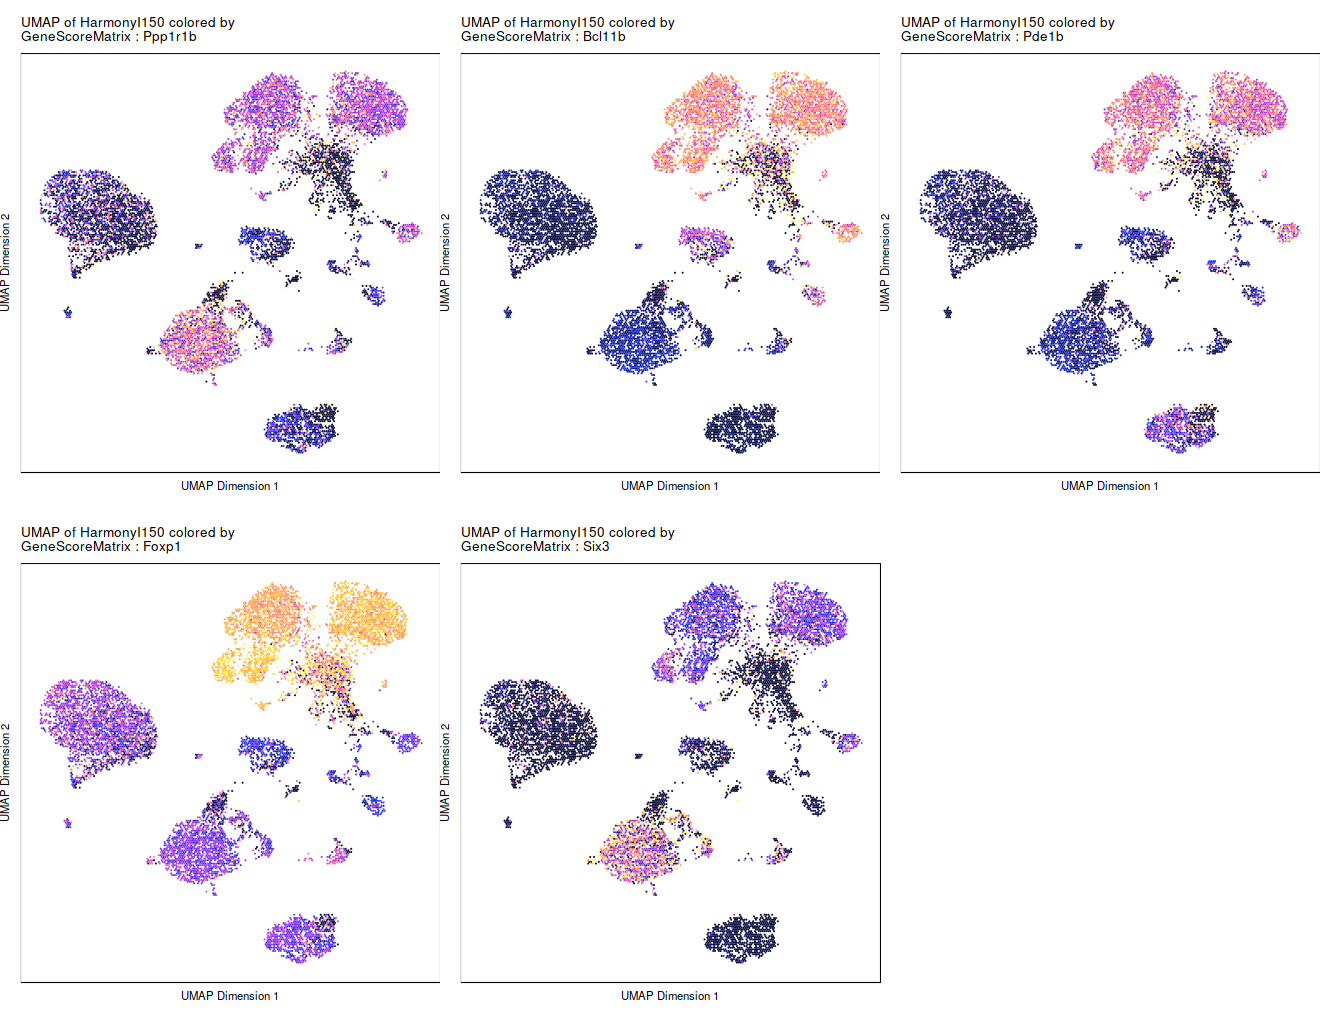

In [7]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP", imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b2715fc70-Date-2021-01-28_Time-16-34-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-28 16:34:42 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b2715fc70-Date-2021-01-28_Time-16-34-41.log



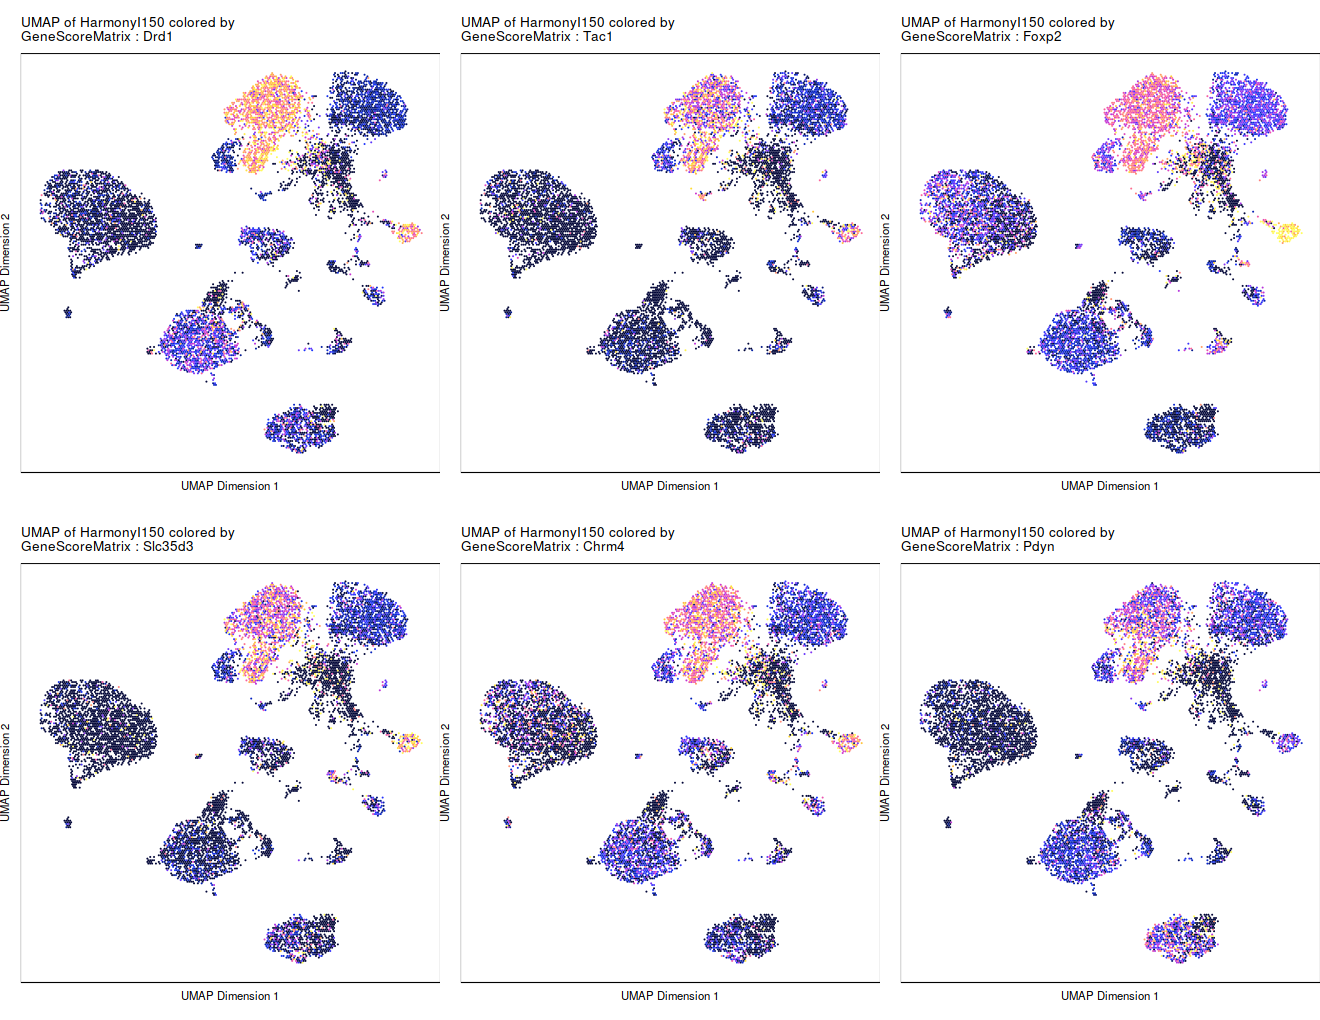

In [8]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP", imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b69b1945d-Date-2021-01-28_Time-16-35-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-28 16:35:02 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b69b1945d-Date-2021-01-28_Time-16-35-01.log



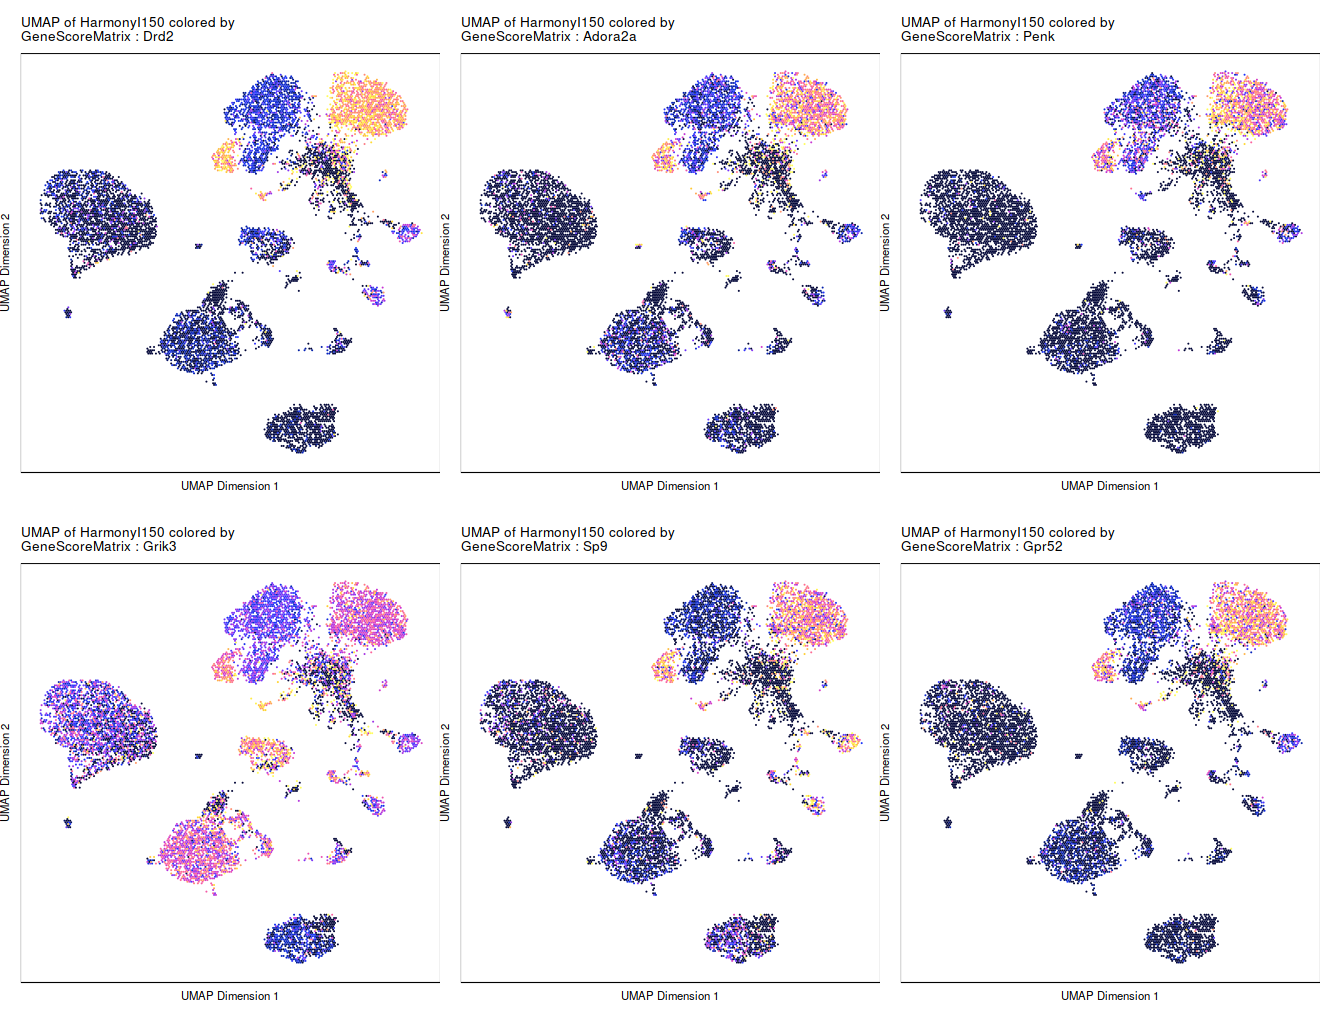

In [9]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p2))


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b3556c556-Date-2021-01-28_Time-16-35-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-28 16:35:21 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b3556c556-Date-2021-01-28_Time-16-35-20.log



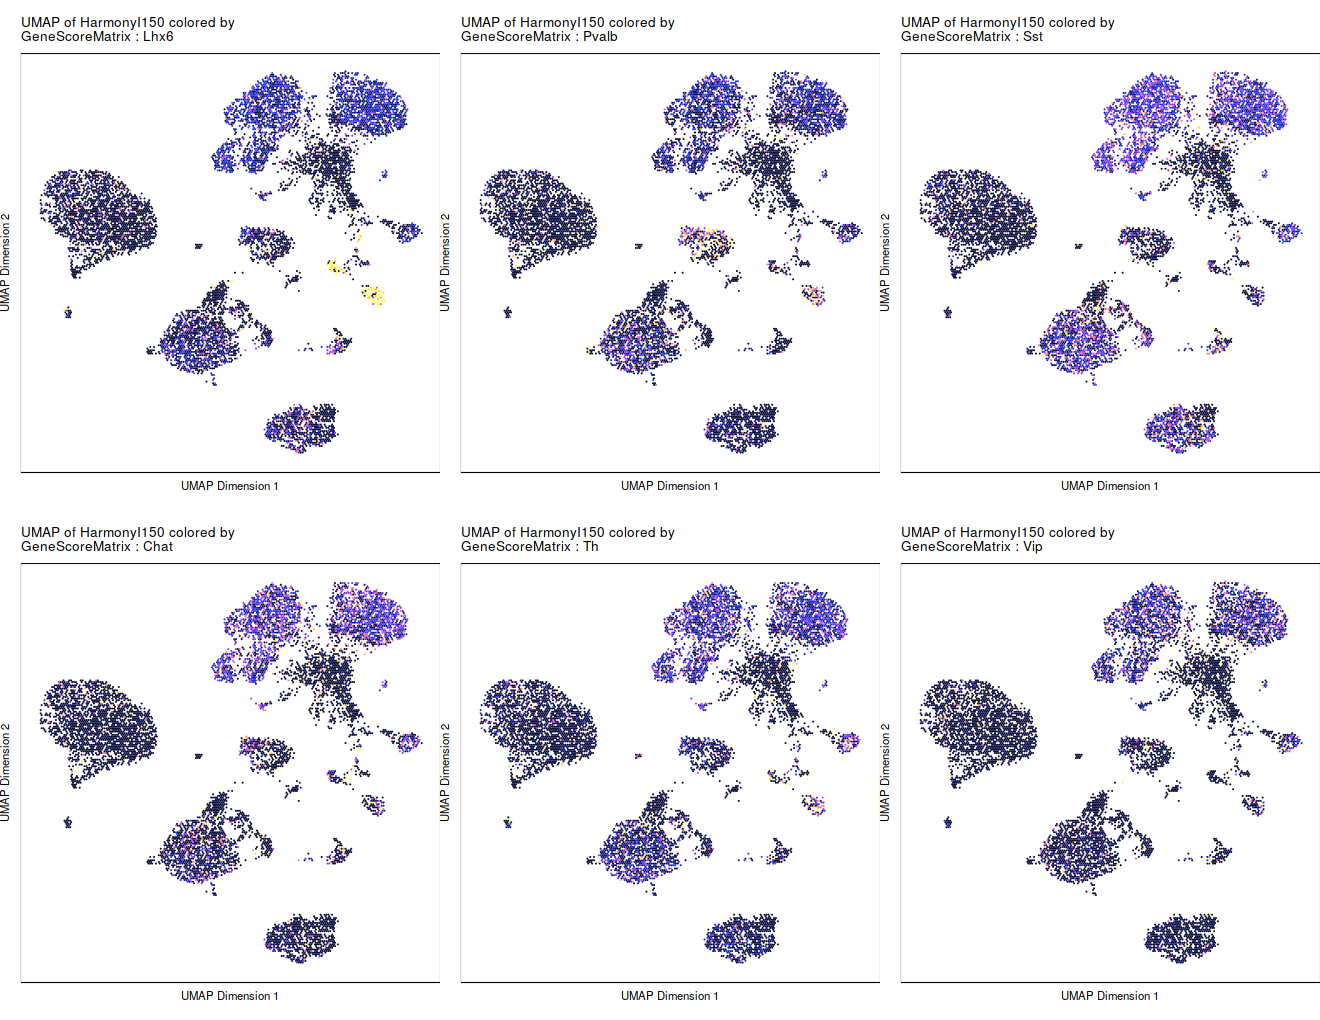

In [10]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", imputeWeights = NULL,
                    name = markerGenes1, embedding = "UMAP")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [ ]:
## Neuron vs. Glia markers
markerGenes1  <- c('Drd1', # D1 MSN
                   'Adora2a', #D2 MSN
                   'Foxp2', # Striatonigral MSN
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' ,# Oligo,
                   'Cemip', # mural-fibroblast like
                   'Itga1' # endothelia
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b33ead9ea-Date-2021-01-29_Time-09-40-53.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-29 09:40:54 : 



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b79449cfb-Date-2021-01-28_Time-20-16-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b79449cfb-Date-2021-01-28_Time-20-16-12.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b2803651c-Date-2021-01-28_Time-20-16-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b2803651c-Date-2021-01-28_Time-20-16-13.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b3407103a-Date-2021-01-28_Time-20-16-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : Arch

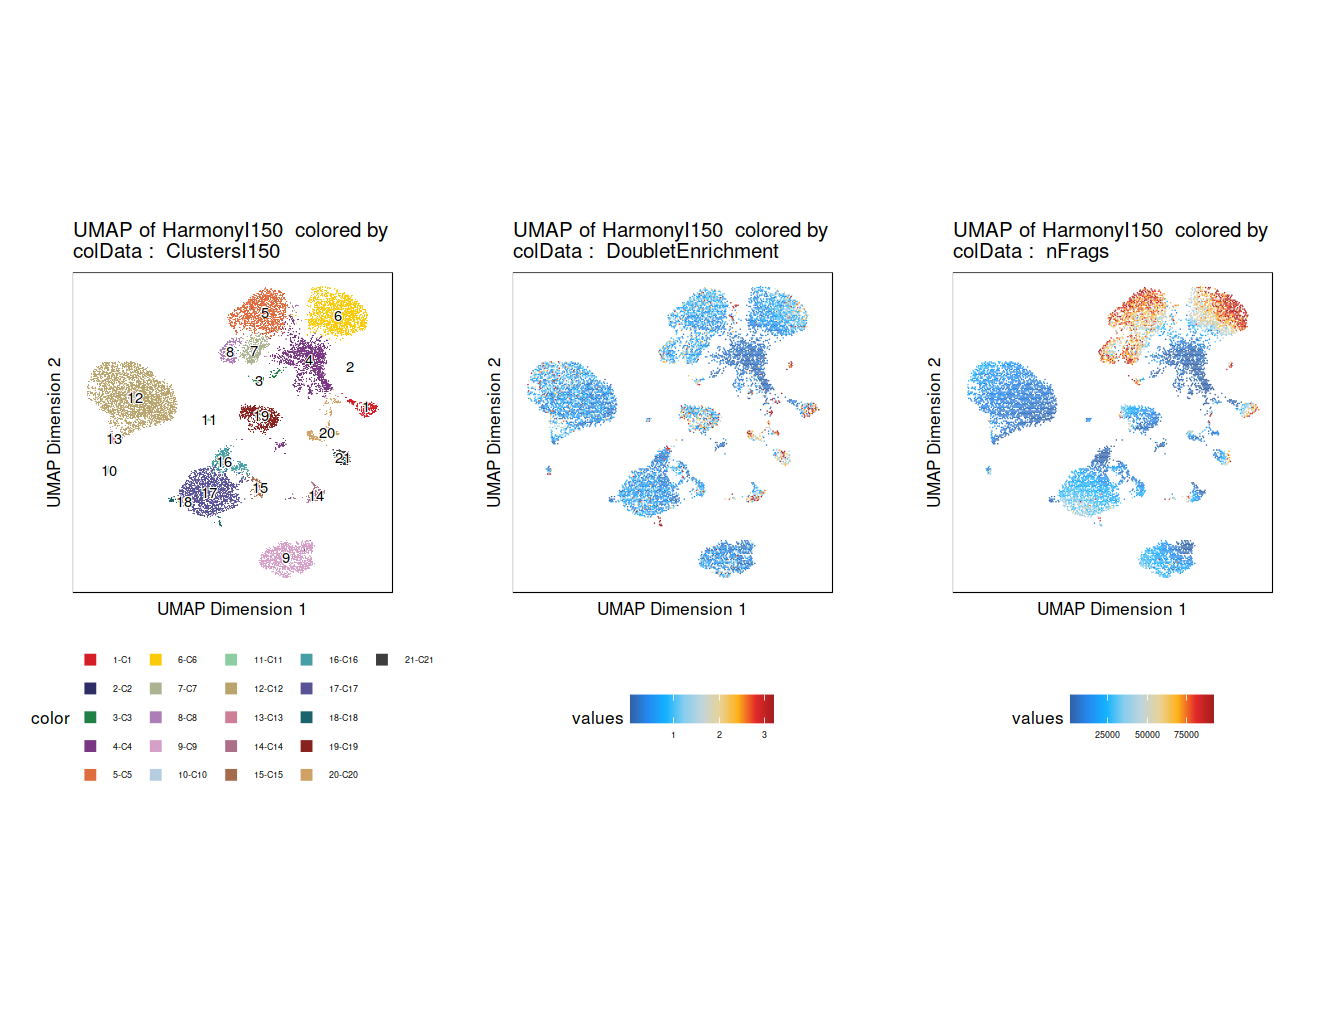

In [22]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersI150", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "nFrags", embedding = "UMAP")

ggAlignPlots(p1, p2,p3, type = "h")

# Relabel cluster and call peaks

In [24]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' = 'MSN_SN',
    'C2' = 'Drop', # doublet
    'C3' = 'UNK1',
    'C4' = 'Drop', # slushbucket MSNs, low frag cells
    'C5' = 'MSN_D1',
    'C6' = 'MSN_D2',
    'C7' = 'MSN_D1_Patch',
    'C8' = 'MSN_D2_Patch',
    'C9' = 'Microglia',
    'C10'= 'Drop',
    'C11'= 'UNK2',
    'C12'= 'Oligo',
    'C13'= 'Oligo',
    'C14'= 'UNK3',
    'C15'= 'Astro',
    'C16'= 'Drop',
    'C17'= 'Astro',
    'C18'= 'Drop',
    'C19'= 'OPC',
    'C20'= 'INT_UNK',
    'C21'= 'INT_Pvalb'
)
proj$Clusters2 <- mapLabels(proj$ClustersI150, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)
proj = saveArchRProject(ArchRProj = proj)


       Astro         Drop    INT_Pvalb      INT_UNK    Microglia       MSN_D1 
        1665         1861          127          221         1028         1286 
MSN_D1_Patch       MSN_D2 MSN_D2_Patch       MSN_SN        Oligo          OPC 
         349         1513          250          192         2901          556 
        UNK1         UNK2         UNK3 
          87           31          159 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b9f24f09-Date-2021-01-28_Time-20-17-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b9f24f09-Date-2021-01-28_Time-20-17-22.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b6b2ac550-Date-2021-01-28_Time-20-17-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b6b2ac550-Date-2021-01-28_Time-20-17-23.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-302b1bc9d2d3-Date-2021-01-28_Time-20-17-24.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-302b1bc9d2d3-Date-2021-01-28_Time-20-17

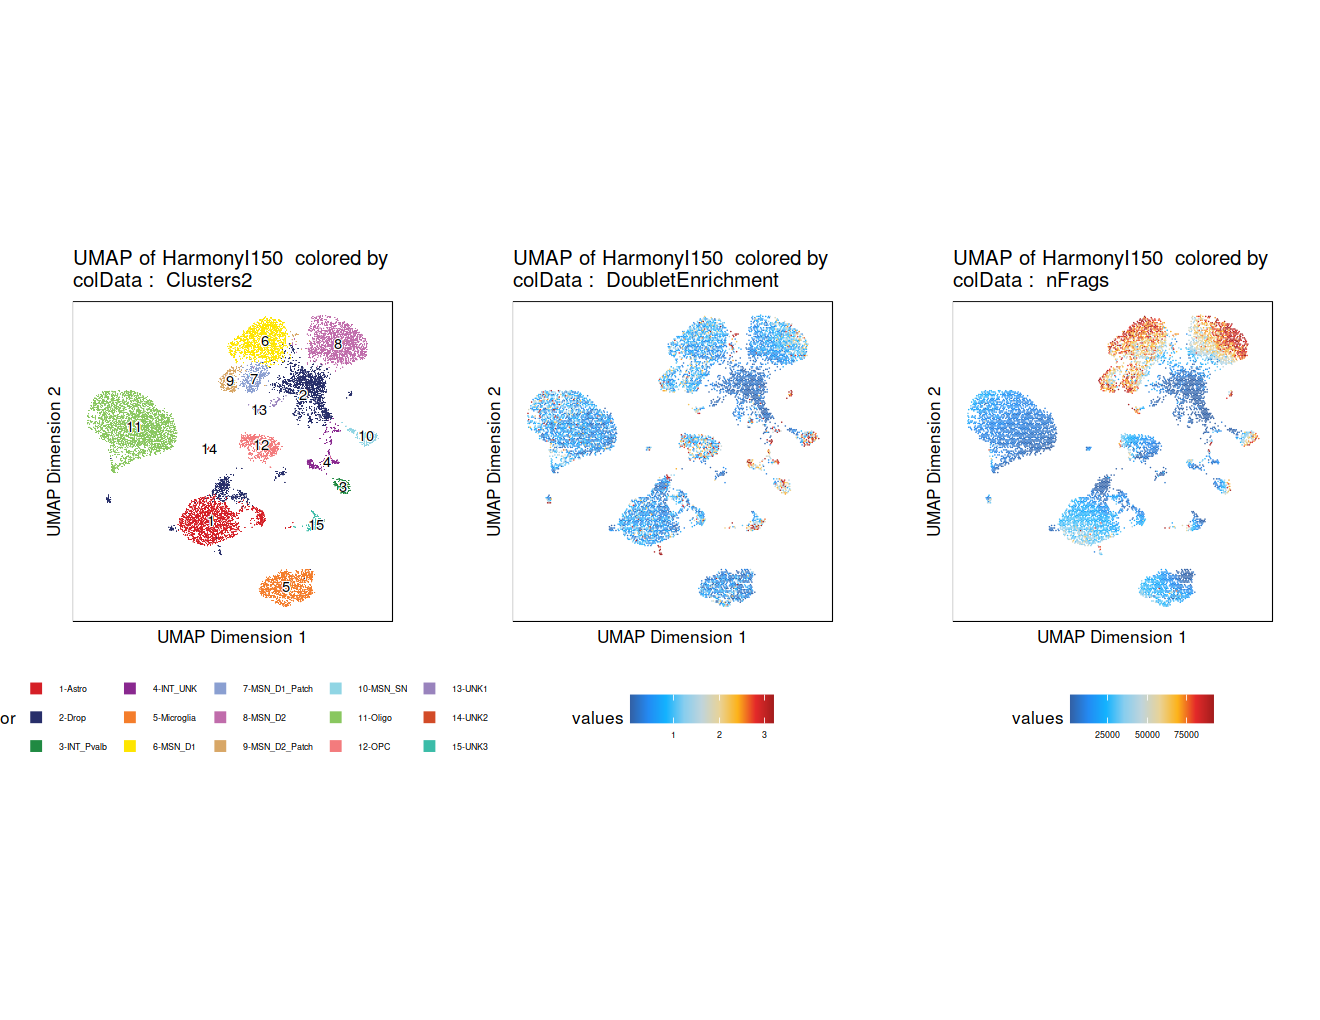

In [25]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "nFrags", embedding = "UMAP")

ggAlignPlots(p1, p2,p3, type = "h")

In [27]:
# drop the drop clusters
ARCHDIR2=file.path(PROJDIR,'ArchR_Stauffer_caudate_labeled')
idxSample <- BiocGenerics::which(proj$Clusters2 %ni% c("Drop",'UNK1', 'UNK2', 'UNK3') & 
                                 proj$DoubletEnrichment < 2.5)# further filter likely doublets @ edges
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/machineLearningForComputationalBiology/snATAC_cross_species_caudate/data/raw_data/rheMac10/Stauffer_caudate/ArchR_Stauffer_caudate_labeled

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
           

In [28]:
# make group coverage, call peaks, and 
proj2<-addGroupCoverages(proj2, groupBy="Clusters2", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-302b6f000246-Date-2021-01-28_Time-20-37-52.log
If there is an issue, please report to github with logFile!

Astro (1 of 11) : CellGroups N = 2

INT_Pvalb (2 of 11) : CellGroups N = 2

INT_UNK (3 of 11) : CellGroups N = 2

Microglia (4 of 11) : CellGroups N = 2

MSN_D1 (5 of 11) : CellGroups N = 2

MSN_D1_Patch (6 of 11) : CellGroups N = 2

MSN_D2 (7 of 11) : CellGroups N = 2

MSN_D2_Patch (8 of 11) : CellGroups N = 2

MSN_SN (9 of 11) : CellGroups N = 2

Oligo (10 of 11) : CellGroups N = 2

OPC (11 of 11) : CellGroups N = 2

2021-01-28 20:37:54 : Further Sampled 4 Groups above the Max Fragments!, 0.024 mins elapsed.

2021-01-28 20:37:54 : Creating Coverage Files!, 0.033 mins elapsed.

2021-01-28 20:37:54 : Batch Execution w/ safelapply!, 0.033 mins elapsed.

2021-01-28 20:51:27 : Adding Kmer Bias to Coverage Files!, 13.574 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 22)

Adding Kmer Bias (2 of 22)

Adding K

In [29]:
# call peaks 
proj2<-addReproduciblePeakSet(proj2, groupBy = "Clusters2", plot = FALSE, genomeSize = 2.7e9)
proj2 = saveArchRProject(ArchRProj = proj2)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-302b560ec339-Date-2021-01-28_Time-21-05-17.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2021-01-28 21:05:18 : Peak Calling Parameters!, 0.007 mins elapsed.



                    Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astro               Astro   1616       1000           2  500  500   150000
INT_Pvalb       INT_Pvalb    100        100           2   41   59    50000
INT_UNK           INT_UNK    145        145           2   66   79    72500
Microglia       Microglia   1012        990           2  490  500   150000
MSN_D1             MSN_D1   1250       1000           2  500  500   150000
MSN_D1_Patch MSN_D1_Patch    331        331           2  158  173   150000
MSN_D2             MSN_D2   1462       1000           2  500  500   150000
MSN_D2_Patch MSN_D2_Patch    219        219           2  100  119   109500
MSN_SN             MSN_SN    130        130           2   64   66    65000
Oligo               Oligo   2794       1000           2  500  500   150000
OPC                   OPC    443        443           2  163  280   150000


2021-01-28 21:05:18 : Batching Peak Calls!, 0.007 mins elapsed.

2021-01-28 21:05:18 : Batch Execution w/ safelapply!, 0 mins elapsed.

2021-01-28 22:32:48 : Identifying Reproducible Peaks!, 87.511 mins elapsed.

2021-01-28 22:34:38 : Creating Union Peak Set!, 89.343 mins elapsed.

Converged after 9 iterations!

2021-01-28 22:34:49 : Finished Creating Union Peak Set (399918)!, 89.524 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /               

In [30]:
# add peak counts matrix 
proj2 <- addPeakMatrix(proj2)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-302b4b945ab4-Date-2021-01-28_Time-22-34-58.log
If there is an issue, please report to github with logFile!

2021-01-28 22:34:58 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-302b4b945ab4-Date-2021-01-28_Time-22-34-58.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||


In [32]:
# add motif enrichment matrix
proj2 <- addMotifAnnotations(ArchRProj = proj2, motifSet = "JASPAR2018", name = "Motif")
proj2 = saveArchRProject(ArchRProj = proj2)

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-302b11ed4c7e-Date-2021-01-28_Time-22-40-44.log
If there is an issue, please report to github with logFile!

2021-01-28 22:40:49 : Gettting Motif Set, Species : , 0.004 mins elapsed.

2021-01-28 22:41:32 : Finding Motif Positions with motifmatchr!, 0.724 mins elapsed.

2021-01-28 22:58:40 : Creating Motif Overlap Matrix, 17.852 mins elapsed.

2021-01-28 22:58:57 : Finished Getting Motif Info!, 18.133 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-302b11ed4c7e-Date-2021-01-28_Time-22-40-44.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\ 

In [33]:
# add motif deviations matrix
proj2 <- addBgdPeaks(proj2)
proj2 <- addDeviationsMatrix(proj2,  peakAnnotation = "Motif", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

Identifying Background Peaks!

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-302b11d2c618-Date-2021-01-28_Time-23-00-15.log
If there is an issue, please report to github with logFile!



NULL


2021-01-28 23:00:23 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2021-01-29 02:44:22 : Completed Computing Deviations!, 224.117 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-302b11d2c618-Date-2021-01-28_Time-23-00-15.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__              

In [35]:
# add co-accessibility matrix
proj2 <- addCoAccessibility(proj2, reducedDims = "HarmonyI150", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-302b2afdb2a2-Date-2021-01-29_Time-06-44-57.log
If there is an issue, please report to github with logFile!

2021-01-29 06:44:57 : Computing KNN, 0.006 mins elapsed.

2021-01-29 06:44:58 : Identifying Non-Overlapping KNN pairs, 0.008 mins elapsed.

2021-01-29 06:45:01 : Identified 483 Groupings!, 0.058 mins elapsed.

2021-01-29 06:45:07 : Computing Co-Accessibility chr1 (1 of 21), 0.172 mins elapsed.

2021-01-29 06:45:40 : Computing Co-Accessibility chr2 (2 of 21), 0.72 mins elapsed.

2021-01-29 06:46:03 : Computing Co-Accessibility chr3 (3 of 21), 1.094 mins elapsed.

2021-01-29 06:46:26 : Computing Co-Accessibility chr4 (4 of 21), 1.476 mins elapsed.

2021-01-29 06:46:46 : Computing Co-Accessibility chr5 (5 of 21), 1.817 mins elapsed.

2021-01-29 06:47:02 : Computing Co-Accessibility chr6 (6 of 21), 2.082 mins elapsed.

2021-01-29 06:47:21 : Computing Co-Accessibility chr7 (7 of 21), 2.406 mins elapsed.

2021-01-29 06:47:45 : Compu